In [1]:
# Import libraries
import pandas as pd
import numpy as np
import re
from pathlib import Path

In [2]:
# Import data and process into usable format
data_list = []

for p in Path('../data/aclimdb/train/neg').glob('*.txt'):
    with p.open() as f:
        file_name = re.split('_|\.', p.name)
        review_id = file_name[0]
        review_score = int(file_name[1])
        # append review id, review score, review text, and binary label (0 = negative)
        data_list.append([review_id, review_score, f.read(), 0])

for p in Path('../data/aclimdb/train/pos').glob('*.txt'):
    with p.open() as f:
        file_name = re.split('_|\.', p.name)
        review_id = file_name[0]
        review_score = int(file_name[1])
        # append review id, review score, review text, and binary label (1 = positive)
        data_list.append([review_id, review_score, f.read(), 1])

df = pd.DataFrame(data_list, columns = ['review_id', 'review_score', 'review_text', 'label'])

In [3]:
# Examine data
print("Shape:", df.shape)
print("Total positive: ", sum(df['label']))
df.head()

Shape: (25000, 4)
Total positive:  12500


,review_id,review_score,review_text,label
0,1821,4,Working with one of the best Shakespeare sourc...,0
1,10402,1,"Well...tremors I, the original started off in ...",0
2,1062,4,Ouch! This one was a bit painful to sit throug...,0
3,9056,1,"I've seen some crappy movies in my life, but t...",0
4,5392,3,"""Carriers"" follows the exploits of two guys an...",0


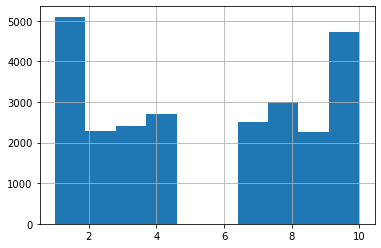

In [4]:
# Check distribution of scores
df['review_score'].hist(bins = 10)

count    25000.000000
mean       233.776720
std        173.715418
min         10.000000
25%        127.000000
50%        174.000000
75%        284.000000
max       2470.000000
Name: review_text, dtype: float64


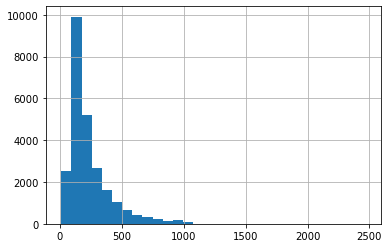

In [23]:
# Check length of reviews (~number of words)
review_lengths = df.review_text.str.split(" ").str.len()
print(review_lengths.describe())
review_lengths.hist(bins = 30)

In [32]:
# Examine longest review
df.review_text[np.argmax(review_lengths)]

'Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, bu